# Merge Dataframe

In [25]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [26]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot.drop(columns='month_no', inplace=True)

In [27]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [28]:
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [29]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on="job_posted_month")

In [30]:
top5 = (
    df_US_merged
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.
    to_list()
)

top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

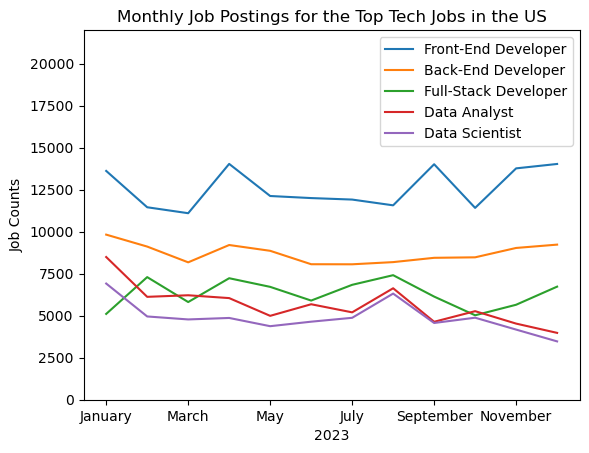

In [31]:
df_US_merged[top5].plot(kind='line')
plt.title('Monthly Job Postings for the Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Counts')
plt.ylim(0, 22000)
plt.legend()
plt.show()

In [32]:
df_us_jobs = df[df['job_country'] == 'United States'].copy()

df_monthly_postings = df.copy()

In [33]:
df_us_jobs['job_posted_month'] = df_us_jobs['job_posted_date'].dt.month

df_monthly_postings['job_posted_month'] = df_monthly_postings['job_posted_date'].dt.month

df_monthly_postings = df_monthly_postings['job_posted_month'].value_counts().sort_index()

df_merged1 = df_us_jobs.merge(df_monthly_postings,on='job_posted_month', how='right' )

df_merged1.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",1,91822
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",1,91822
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",1,91822
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",1,91822
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",1,91822


In [39]:
df_not_remote_jobs = df[df['job_work_from_home'] == False].copy()

df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remote_avg'}, inplace=True)
merged_df = df_not_remote_jobs.merge(df_not_remote_salary, on='job_title_short', how='right')

merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",90177.41994


In [52]:
df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index().copy()

In [54]:
df_company_remote = df[df['job_work_from_home'] == True].copy()

df_company_remote = df_company_remote.pivot_table(values='job_work_from_home', index='company_name', aggfunc='sum')


df_company_remote.rename(columns={'job_work_from_home': 'remote_count'}, inplace=True)

df_merge2 = df_company_salary.merge(df_company_remote, on='company_name', how='inner')

df_merge2

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1
...,...,...,...
22983,知名外企,NaN,1
22984,精鼎医药,NaN,1
22985,英屬維京群島商瑞嘉耐思科技有限公司台灣分公司,NaN,1
22986,雅虎,NaN,2
